# Academic Integrity Statement

As a matter of Departmental policy, **we are required to give you a 0** unless you **type your name** after the following statement: 

> *I certify on my honor that I have neither given nor received any help, or used any non-permitted resources, while completing this evaluation.*

\[TYPE YOUR NAME HERE\]

### Partial Credit

Let us give you partial credit! If you're stuck on a problem and just can't get your code to run: 

First, **breathe**. Then, do any or all of the following: 
    
1. Write down everything relevant that you know about the problem, as comments where your code would go. 
2. If you have non-functioning code that demonstrates some correct ideas, indicate that and keep it (commented out). 
3. Write down pseudocode (written instructions) outlining your solution approach. 

In brief, even if you can't quite get your code to work, you can still **show us what you know.**

# Problem 2 (50 points)

A *time series* is a set of data that varies over time. The prices of stonks over days or weeks, CO2 levels over the course of the century or millenium, and even the random walk that you coded in Homework 1 are all examples of time series. 

<figure class="image" style="width:50%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/stonks.png
" alt="An image of a goofy-looking business-person looking at a graph with an upward trend. Beneath the graph is the word stonks." width="300px">
  <figcaption><i></i></figcaption>
</figure>

A time series has two linked parts: the *time* and the *data*. For example, a time series might look like this (run the code block below): 

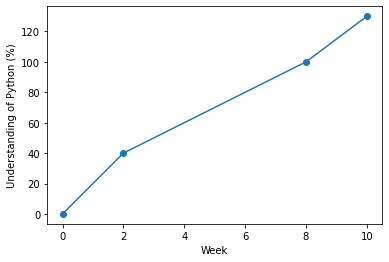

In [1]:
# run this block
from matplotlib import pyplot as plt

time = [0, 2, 8, 10]
data = [0, 40, 100, 130]

plt.plot(time, data)
plt.scatter(time, data)
l = plt.gca().set(xlabel = "Week", ylabel = "Understanding of Python (%)")

*Whoa! You're going to understand Python 130% by week 10! The numbers don't lie.*

This is a 4-point time-series. Note that it is not required that the time be measured in regular intervals. 

In this problem, you will create and use a class to represent time series. 

### Comments and Docstrings Encouraged, Not Required

In Problem 2, docstrings and comments are not required for any of the parts. You are still encouraged to add them to explain your approach, per the note on Partial Credit above.
    
    
## Part A (10 points)

Create a `TimeSeries` class. This class should have two instance variables. The `time` instance variable should be able to contain multiple measurements of time, **which you may assume to be numeric** (i.e. `int` or `float`). The `data` instance variable should be able to contain multiple measurements of some data, **which you may also assume to be numeric.** The user should be able to pass `list`s containing the `time` and `data` measurements to the `TimeSeries` class on construction. 

At this stage, the only functionality required of your class is to store the `time` and `data` and *check that the `time` and `data` passed by the user have the same length.* If they do not, raise an informative `ValueError`. 

Show that your code works by running this first test: 

```python
time = [ 0.0,  2.0,  9.0,  15.0]
data = [-0.2, -0.4, -0.8,  -0.5]
t    = TimeSeries(time, data)
print(t.time, t.data)            # should print something
```

Then, show that your code displays the expected behavior on this second test.

```python
time = [ 0.0,  2.0,  9.0]
data = [-0.2, -0.4, -0.8, - 0.5]
t    = TimeSeries(time, data)

# informative ValueError
```

#### No Copy/Paste

Further parts of this problem will ask you to add to and modify your `TimeSeries` class. **It is not necessary to copy and paste for this**. You can and should write the entire `TimeSeries` class definition, as well as additional supporting code, **in the single code cell below.** 

For example, your Part C solution should go in the code cell directly below -- only the code used to test your solution should be shown in Part C. 

In subsequent parts, you need only write and run test code that demonstrates the correct functioning of your solution. This code will be supplied for you.  

In [40]:
# your class and supporting code here

import numpy as np

class TimeSeries:
    
    # part (A)
    def __init__(self, time, data):
        if len(time) != len(data):
            raise ValueError("time and data must have same length.")
        
        # incorporation of np.array calls is part of (C)
        self.time = np.array(time)
        self.data = np.array(data)
        
    # part (B)
    def __str__(self):
        return("An object of class TimeSeries\ntime: " + \
               str(self.time) + "\ndata: " + str(self.data))
       
    # part (C)
    def __add__(self, other):
        if np.all(self.time == other.time):
            t = TimeSeries(self.time, self.data + other.data)
            return t
        else:
            raise ValueError("times must match between timeseries")
    
    # part (E), optional
    def plot(self):
        plt.plot(self.time, self.data)
        plt.scatter(self.time, self.data)
    
    # part (D)
    def __iter__(self):
        return TimeSeriesIterator(self)

# also part (D)
class TimeSeriesIterator:
    
    def __init__(self, t):
        self.time = t.time
        self.data = t.data
        self.i = 0
    
    def __next__(self):
        
        # it would also work to use an if-clause to check 
        # whether self.i <= len(self.time). 
        try:
            self.i += 1
            return self.time[self.i-1], self.data[self.i-1]
        except IndexError:
            raise StopIteration

In [32]:
# first test here
time = [ 0.0,  2.0,  9.0,  15.0]
data = [-0.2, -0.4, -0.8, - 0.5]
t    = TimeSeries(time, data)
print(t.time, t.data)

[ 0.  2.  9. 15.] [-0.2 -0.4 -0.8 -0.5]


In [33]:
# second test here
time = [ 0.0,  2.0,  9.0]
data = [-0.2, -0.4, -0.8, - 0.5]
t    = TimeSeries(time, data)

ValueError: time and data must have same length.

## Part B (10 points)

Now implement useful printing for your class, allowing the user to easily inspect a `TimeSeries` object. Demonstrate that the following test works: 

```python
t = TimeSeries([0.1, 2.5, 3.8], [0.5, -0.2, 0.2])
print(t)
```

```
# printed output
An object of class TimeSeries
time: [0.1 2.5 3.8]
data: [ 0.5 -0.2  0.2]

# also acceptable
An object of class TimeSeries
time: [0.1,   2.5,  3.8]
data: [0.5,  -0.2,  0.2]
```

It is not necessary to implement elegant spacing or other cosmetic features, although you are free to do so if you'd like to. Commas in your printed output are acceptable but optional. 

In [34]:
# test here
t = TimeSeries([0.1, 2.5, 3.8], [0.5, -0.2, 0.2])
print(t)

An object of class TimeSeries
time: [0.1 2.5 3.8]
data: [ 0.5 -0.2  0.2]


## Part C (10 points)

Implement *addition* of `TimeSeries` objects. 

1. It is possible to add two `TimeSeries` objects together only if their `time` instance variables are identical. If they are not, raise an informative `ValueError`. 
2. If the `time` instance variables are identical, then the result of adding two `TimeSeries` objects is a third `TimeSeries` with the same `time` instance variable and with `data` variable given by the sum of the `data` instance variables of the summands. 

Demonstrate that the following test works: 

```python
t1 = TimeSeries([0.7, 2.4, 3.3], [0.5, -0.2, 0.2])
t2 = TimeSeries([0.7, 2.4, 3.3], [0.2, 0.1, -0.2])
t3 = t1 + t2
print(t3)
```

```
# printed output
time: [0.7 2.4 3.3]
data: [ 0.7 -0.1  0. ]
```

Demonstrate that this test also works: 

```python
t1 = TimeSeries([0.7, 2.4, 3.3], [0.5, -0.2, 0.2])
t2 = TimeSeries([0.0, 1.0, 2.0], [0.2, 0.1, -0.2])
t3 = t1 + t2
```

```
# time variables don't match, informative ValueError here
```

**For full credit, your solution should require no `for`-loops or list comprehensions.** 

***Hint***: Your user will supply `list` input, but the stored instance variables don't have to be `list`s. It may be helpful to modify the `__init__()` method. 

In [35]:
# first test here
t1 = TimeSeries([0.0, 2.0, 3.0], [0.5, -0.2, 0.2])
t2 = TimeSeries([0.0, 2.0, 3.0], [0.2, 0.1, -0.2])
t3 = t1 + t2
print(t3)

An object of class TimeSeries
time: [0. 2. 3.]
data: [ 0.7 -0.1  0. ]


In [36]:
# second test here
t1 = TimeSeries([0.0, 2.0, 3.0], [0.5, -0.2, 0.2])
t2 = TimeSeries([0.0, 1.0, 2.0], [0.2, 0.1, -0.2])
t3 = t1 + t2

ValueError: times must match between timeseries

## Part D (20 points)

Implement *iteration* for your `TimeSeries` class. Your goal is to make the following code work: 

```
t1 = TimeSeries([0.0, 2.0, 3.0], [0.5, -0.2, 0.2])
for (t, d) in t1:
    print("time = " + str(t) + ", data = " + str(d))
```

```
# printed output
time = 0.0, data = 0.5
time = 2.0, data = -0.2
time = 3.0, data = 0.2
```

There are multiple good solutions. For full credit, do **not** define `__next__()` inside the `TimeSeries` class. 

In [37]:
# test here
t1 = TimeSeries([0.0, 2.0, 3.0], [0.5, -0.2, 0.2])
for (t, d) in t1:
    print("time = " + str(t) + ", data = " + str(d))

time = 0.0, data = 0.5
time = 2.0, data = -0.2
time = 3.0, data = 0.2


## Part (E) (optional, 0 points)

If you'd like, you can add a visualization method for your class. Provided that you have solved Part (A), you can add the following code: 

```python
# put this above your class definition
from matplotlib import pyplot as plt

# include this as a class method
def plot(self):
    plt.plot(self.time, self.data)
    plt.scatter(self.time, self.data)
```

You can then call the code below to generate a simple plot of a timeseries. 

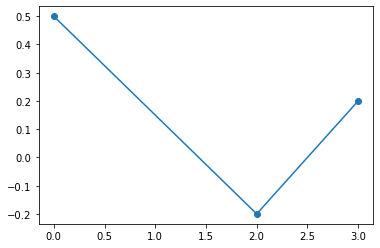

In [38]:
t1 = TimeSeries([0.0, 2.0, 3.0], [0.5, -0.2, 0.2])
t1.plot()